# Generating Word Embedding Models using Gensim, Exploratory Data Analysis Notebook

In [1]:
sys.path.append(r"C:\Users\robal\Dropbox\UChicago\Year II\Quarter III\Advanced Machine Learning\Project\GenderProject")

In [2]:
import pandas as pd 
import numpy as np 
import gensim 
import spacy 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
## NN based spanish sentiment scorer built on Tensorflow + Keras
from sentiment_analysis_spanish import sentiment_analysis
from pre_process.text_utils import *

nlp_spanish = spacy.load("es_core_news_sm")

%load_ext autoreload
%autoreload 2

## Load all three corpus.

In [3]:
jornada_df = pd.read_excel("../data/Mexico/la_jornada_scraped.xlsx")
universal_df = pd.read_excel("../data/Mexico/el_universal_scraped.xlsx")
el_heraldo_df = pd.read_excel("../data/Mexico/Heraldo_scraped.xlsx")

In [7]:
print(f"""
          There are {jornada_df.shape[0]} articles from la Jornada.
          There are {universal_df.shape[0]} articles from el Universal.
          There are {el_heraldo_df.shape[0]} articles from el Heraldo.""")


          There are 2099 articles from la Jornada.
          There are 3513 articles from el Universal.
          There are 2820 articles from el Heraldo.


In [8]:
# Join both text columns
jornada_df["title"] = jornada_df["title"].str.pad(1, side ='right', fillchar =' ')
jornada_df["complete_text"]  = jornada_df.title.str.cat(jornada_df.text).astype(str)

universal_df["complete_text"]  = universal_df.title.str.cat(universal_df.text).astype(str)
el_heraldo_df["complete_text"]  = el_heraldo_df.title.str.cat(el_heraldo_df.text).astype(str)

In [10]:
def tokenize_normalize(df):
    df['tokenized_sentences'] = df['complete_text'].apply(lambda x: [word_tokenize(s, model=nlp_spanish)
                                                                      for s in sent_tokenize(x)])
    df['normalized_sentences'] = df['tokenized_sentences'].apply(lambda x: [normalize_tokens(s, model=nlp_spanish)
                                                                            for s in x])
    return df

In [11]:
jornada_df = tokenize_normalize(jornada_df)
universal_df = tokenize_normalize(universal_df)
el_heraldo_df = tokenize_normalize(el_heraldo_df)

In [12]:
laJornada_w2v  = gensim.models.word2vec.Word2Vec(jornada_df['normalized_sentences'].sum(),window=50, workers=4)
elUniversal_w2v  = gensim.models.word2vec.Word2Vec(universal_df['normalized_sentences'].sum(),window=50, workers=4)
elHeraldo_w2v  = gensim.models.word2vec.Word2Vec(el_heraldo_df['normalized_sentences'].sum(),window=50, workers=4)

In [13]:
# Initialize sentiment scorer object
SentimentScorer = sentiment_analysis.SentimentAnalysisSpanish()

C:\Users\robal\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\robal\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [29]:
words_of_interest = ["hombre", "mujer", "feminicidio", "abuso", "lugar"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")
    try:
        print("...................La Jornada.................................")
        words_tupple = laJornada_w2v.wv.most_similar(word)
        rep_words = [word for word, score in words_tupple]
        print(words_tupple)
        sentiment = SentimentScorer.sentiment(" ".join(rep_words))
        print(f"Sentiment {sentiment}")
        print("...................El Universal................................")
        words_tupple = elUniversal_w2v.wv.most_similar(word)
        rep_words = [word for word, score in words_tupple]
        print(words_tupple)
        sentiment = SentimentScorer.sentiment(" ".join(rep_words))
        print(f"Sentiment {sentiment}")
        print("...................El Heraldo..................................")
        words_tupple = elHeraldo_w2v.wv.most_similar(word)
        rep_words = [word for word, score in words_tupple]
        print(words_tupple)
        sentiment = SentimentScorer.sentiment(" ".join(rep_words))
        print(f"Sentiment {sentiment}")
        print()

    except:
        continue


Finding words most similar to 'hombre' according to its embedding
...................La Jornada.................................
[('huella', 0.9021914005279541), ('habitación', 0.9020096659660339), ('quemadura', 0.8987579345703125), ('cultivo', 0.896045982837677), ('morir', 0.8937722444534302), ('despedirse', 0.8918236494064331), ('herir', 0.8875229358673096), ('abandonar', 0.8844860792160034), ('vehículo', 0.8816244602203369), ('ileso', 0.8802148699760437)]
Sentiment 0.5748699429111652
...................El Universal................................
[('situación', 0.9789005517959595), ('vivir', 0.969200611114502), ('recrudecimiento', 0.9642651081085205), ('tener', 0.9642103314399719), ('serlo', 0.9641522169113159), ('vida', 0.962839663028717), ('sexista', 0.9607220888137817), ('miedo', 0.955224871635437), ('matar', 0.9537892937660217), ('venir', 0.9525167942047119)]
Sentiment 0.06037189753927607
...................El Heraldo..................................
[('golpear', 0.91504216194

## Visualizing Word Embeddings using dimensionality reduction

In [74]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_palette("Dark2")
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [15]:
# Retrieve vectors
X_jornada = laJornada_w2v[laJornada_w2v.wv.vocab]
X_universal = elUniversal_w2v[elUniversal_w2v.wv.vocab]
X_heraldo = elHeraldo_w2v[elHeraldo_w2v.wv.vocab]

<ipython-input-15-c4ea8209679c>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X_jornada = laJornada_w2v[laJornada_w2v.wv.vocab]
<ipython-input-15-c4ea8209679c>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X_universal = elUniversal_w2v[elUniversal_w2v.wv.vocab]
<ipython-input-15-c4ea8209679c>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X_heraldo = elHeraldo_w2v[elHeraldo_w2v.wv.vocab]


In [81]:
def pca_plot(embedings_x, words_of_interest, title,  xlim=None, ylim=None, pca=PCA(n_components=10)):
    """
    Reduce embedding space into first and second principal components.
    Visualize words of interes in pc_1 and pc_2 scores, plot scree to visualize
    variance explained by each PC.
    """
    fig = plt.figure(figsize=(12,10)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1]) 

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    result = pca.fit_transform(embedings_x)
    plt.sca(ax0)
    sns.scatterplot(x=result[:, 0], y=result[:, 1])
    for i, word in enumerate(words_of_interest):
        plt.scatter(result[i, 0], result[i, 1], marker='o', s=100)
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.xlabel("PC1 scores")
    plt.ylabel("PC2 scores")
    plt.title(title)

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)

    plt.sca(ax1)
    sns.lineplot(x=range(1, pca.n_components+1), y=pca.explained_variance_ratio_)
    plt.xlabel("Principal component number")
    plt.ylabel("Variance explained")


    return fig

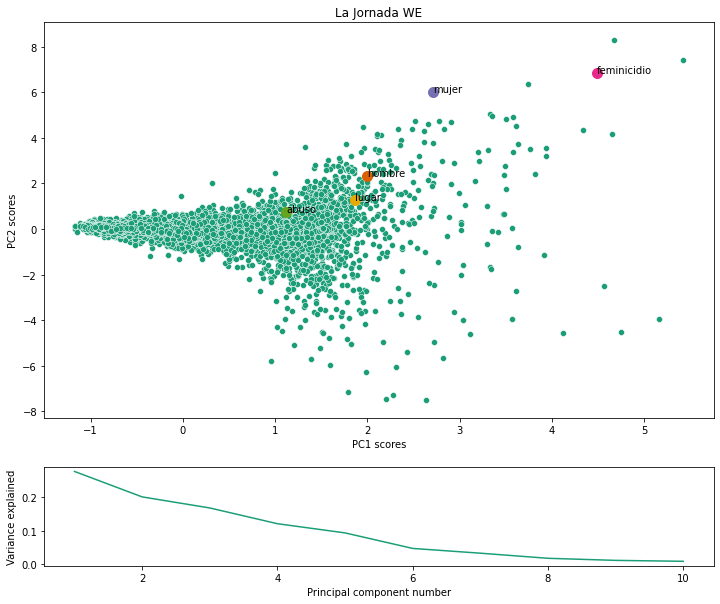

In [82]:
fig = pca_plot(X_jornada, words_of_interest, "La Jornada WE")

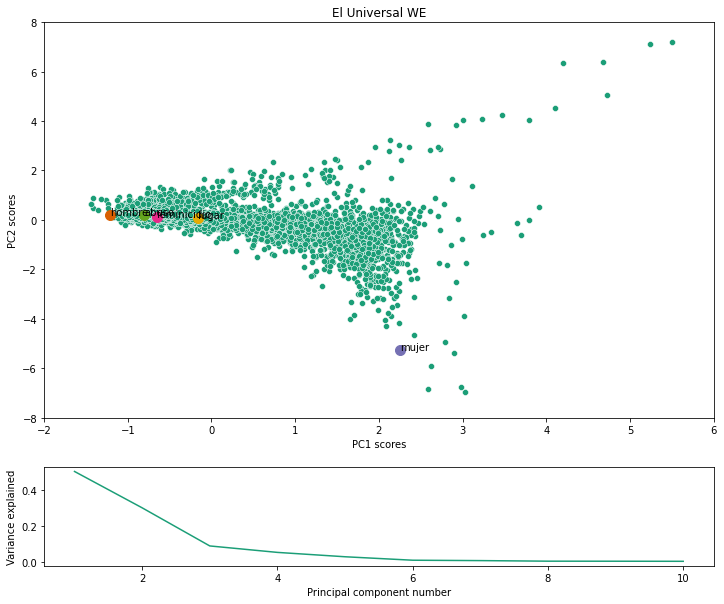

In [84]:
fig = pca_plot(X_universal, words_of_interest, "El Universal WE", [-2, 6], [-8, 8])

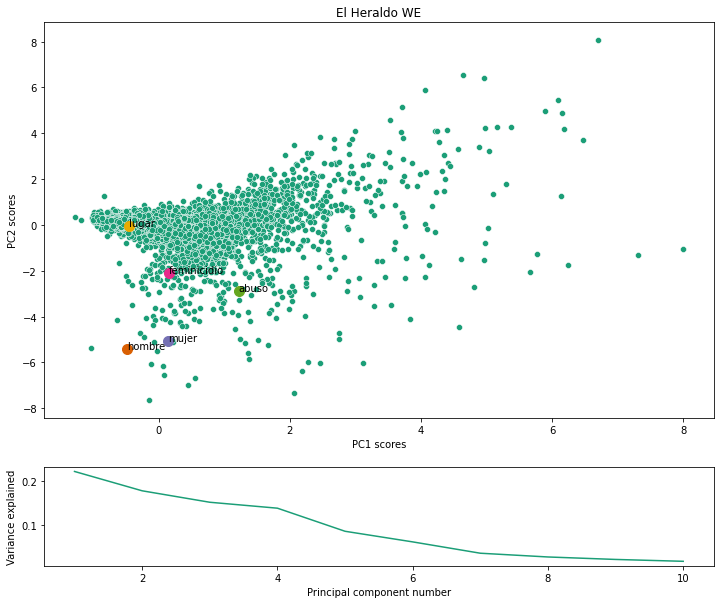

In [85]:
fig = pca_plot(X_heraldo, words_of_interest, "El Heraldo WE")